## Mutated Spike Proteins using Recursive Decision Forests (Qnets)
---

https://zed.uchicago.edu

- Jin Li jinli@uchicago.edu
- Ishanu Chattopadhyay 


In [2]:
import pandas as pd
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import generic_dna
from Bio import SeqIO
%matplotlib inline
import pylab as plt
plt.style.use('ggplot')

In [3]:
# read in data
rfaa=pd.read_csv('../corona/covid19_aa/simulated_sequences_data_standard_aa.csv')

# Two Notions of Sequence Similarity
---

+ Edit distance is the classical "mutation distance" between sequences
+ Q-distance is the distance computed using emergent evolutionary constraints 

These two metrics are correlated but distinct. 
The latter is biologicaly *more meraningful*, since it 
captures which mutations can actually happen in the wild population, 
and factors this information in 
in a rigorous probabilistic setting

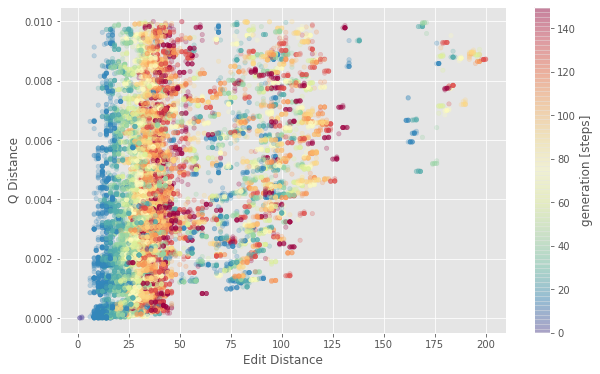

In [4]:
plt.figure(figsize=[10,6])
QTH=.01
ax=rfaa[rfaa.qdistance<QTH].plot.scatter(ax=plt.gca(),x='ldistance',y='qdistance',cmap='Spectral_r',
                                          c=rfaa[rfaa.qdistance<QTH].step.values,alpha=0.25)
ax.set_ylim(-0.0005,QTH+0.0005)
axx=plt.gcf().get_axes()
axx[1].set_ylabel('generation [steps]')
ax.set_xlabel('Edit Distance')
ax.set_ylabel('Q Distance');

# Simulating Viable Evolutionary Trajectories
---

The Q-net models allow us to predict how a given strain in the wild will
change over time, i.e., track diffusion in the strain space.

+ We need to validate that the predicted sequence variations are biologically meaningful.

We select mutated samples which have high edit distance, but a small q-distance. The hypothesis is that since the Q-net captures the "rules of evolution", these are still viable sequences, and will fold correctly and preserve function

In [5]:
# sampling steps as we simulate diffusion in the strain space
STEPS=rfaa.step.value_counts().sort_index().index.values
STEPS

array([  0,   1,  15,  25,  41,  58,  75,  92, 100, 110, 130, 150])

In [6]:
NUM=500
QTH=0.01
DF=pd.concat([rfaa[(rfaa.qdistance<QTH) 
                   & (rfaa.step==i)].sort_values('qdistance').head(NUM).sort_values('ldistance',ascending=False).head(1)
           for i in STEPS])
DF=DF.set_index('step')

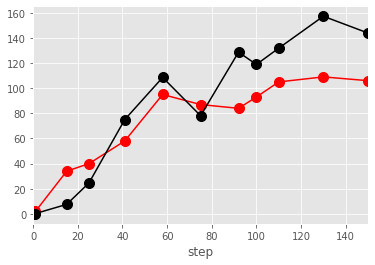

In [7]:
# plot Edit distance vs scaled Q-distance
DF.ldistance.plot(style='-ro',ms=10)
(60000*DF.qdistance).plot(style='-ko',ms=10)

# Predicted Sequences 
---
+ ldistance: Edit distance (no of mutations from the originating strain)
+ accession: Accession number of originating strain
+ file_name: fasta file in the same directory

In [8]:
DF

,accession,file_name,ldistance,qdistance,sequence
step,,,,,
0,MT126808,MT126808/step_0.fasta,1,0.000000,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
1,MT126808,MT126808/step_1.fasta,2,0.000005,MFVFLVLLPLVSSQCVNLTTRTQLPIAYTNSFTRGVYYPDKVFRSS...
15,EPI_ISL_415135,EPI_ISL_415135/step_15.fasta,34,0.000127,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
25,EPI_ISL_417205,EPI_ISL_417205/step_25.fasta,40,0.000411,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
41,EPI_ISL_413859,EPI_ISL_413859/step_41.fasta,58,0.001250,MFVFLVLLPLVSSQCVNLTTRTQLVPAYTNSFTRGVYYPDKVFRSS...
58,EPI_ISL_414495,EPI_ISL_414495/step_58.fasta,95,0.001810,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
75,EPI_ISL_416623,EPI_ISL_416623/step_75.fasta,87,0.001302,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYQPDKVFRSS...
92,EPI_ISL_416623,EPI_ISL_416623/step_92.fasta,84,0.002145,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYQPDKVFRSS...
100,EPI_ISL_415589,EPI_ISL_415589/step_100.fasta,93,0.001981,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
